In [1]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline 

In [2]:
img = cv2.imread('./test_images/0x0.jpg')
img.shape

(540, 960, 3)

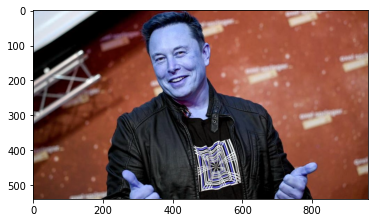

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(540, 960)

In [5]:
gray

array([[215, 215, 215, ...,  59,  60,  61],
       [215, 215, 215, ...,  59,  60,  60],
       [215, 215, 215, ...,  58,  59,  60],
       ...,
       [ 36,  35,  35, ...,  29,  28,  27],
       [ 36,  35,  35, ...,  29,  28,  27],
       [ 36,  35,  35, ...,  29,  28,  27]], dtype=uint8)

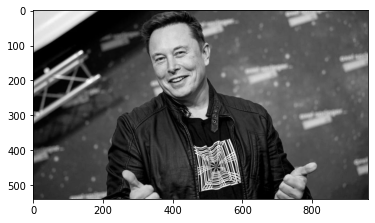

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[310,  57, 180, 180]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(310, 57, 180, 180)

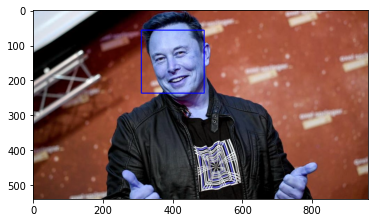

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(face_img)

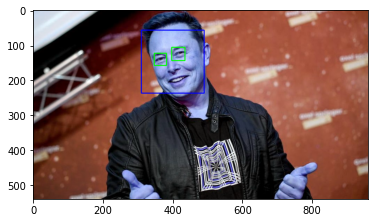

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces :
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) 
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

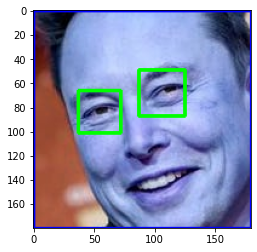

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces :
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

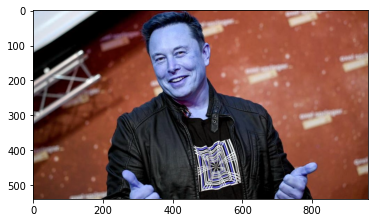

In [13]:
original_image = cv2.imread('./test_images/0x0.jpg')
plt.imshow(original_image)

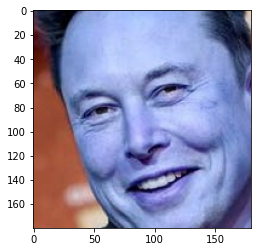

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/0x0.jpg')
plt.imshow(cropped_image)

In [15]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"


In [16]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./dataset/Aman Gupta',
 './dataset/Amancio Ortega',
 './dataset/Anupam Mittal',
 './dataset/Ashneer Grover',
 './dataset/Barbara Corcoran',
 './dataset/Bernard Arnault',
 './dataset/bill gates',
 './dataset/daymond john',
 './dataset/elon musk',
 './dataset/Emma Grede',
 './dataset/Ghazal Alagh',
 './dataset/goutam adani',
 './dataset/Jack Ma',
 './dataset/jeff bezos',
 './dataset/Kevin O_Leary',
 './dataset/larry ellison',
 './dataset/larry page',
 './dataset/Liliane Bettencourt',
 './dataset/Lori Greiner',
 './dataset/Mark Cuban',
 './dataset/mark zukerberg',
 './dataset/michael saul dell',
 './dataset/Mukesh Ambani',
 './dataset/namita thapar',
 './dataset/Narayana Murthy',
 './dataset/Peter Jones CBE',
 './dataset/peyush bansal',
 './dataset/Ratan Tata',
 './dataset/Richard Branson',
 './dataset/Robert Herjavec',
 './dataset/sergey brin',
 './dataset/Sheldon Adelson',
 './dataset/steve jobs',
 './dataset/vineeta singh',
 './dataset/warren buffet']

In [18]:
import shutil 
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_img_dirs=[]
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if img_dir == './dataset/cropped':
            continue
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images to folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name+str(count)+".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Aman Gupta
Amancio Ortega
Anupam Mittal
Ashneer Grover
Barbara Corcoran
Bernard Arnault
bill gates
daymond john
elon musk
Emma Grede
Ghazal Alagh
goutam adani
Jack Ma
jeff bezos
Kevin O_Leary
larry ellison
larry page
Liliane Bettencourt
Lori Greiner
Mark Cuban
mark zukerberg
michael saul dell
Mukesh Ambani
namita thapar
Narayana Murthy
Peter Jones CBE
peyush bansal
Ratan Tata
Richard Branson
Generating cropped images to folder:  ./dataset/cropped/Richard Branson
Robert Herjavec
sergey brin
Sheldon Adelson
steve jobs
vineeta singh
warren buffet


In [37]:
import numpy as np 
import pywt 
import cv2 

def w2d(img, mode = 'haar' , level = 1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    imArray = np.float32(imArray)
    imArray /=255 
    coeffs = pywt.wavedec2(imArray,mode , level = level) 
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeffs_H,mode) 
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

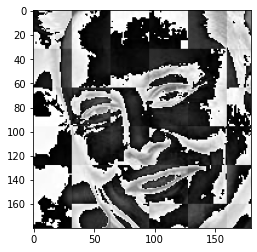

In [38]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [39]:
class_dict = {}
count = 0 ;
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Aman Gupta': 0,
 'Amancio Ortega': 1,
 'Anupam Mittal': 2,
 'Ashneer Grover': 3,
 'Barbara Corcoran': 4,
 'Bernard Arnault': 5,
 'bill gates': 6,
 'daymond john': 7,
 'elon musk': 8,
 'Emma Grede': 9,
 'Ghazal Alagh': 10,
 'goutam adani': 11,
 'Jack Ma': 12,
 'jeff bezos': 13,
 'Kevin O_Leary': 14,
 'larry ellison': 15,
 'larry page': 16,
 'Liliane Bettencourt': 17,
 'Lori Greiner': 18,
 'Mark Cuban': 19,
 'mark zukerberg': 20,
 'michael saul dell': 21,
 'Mukesh Ambani': 22,
 'namita thapar': 23,
 'Narayana Murthy': 24,
 'Peter Jones CBE': 25,
 'peyush bansal': 26,
 'Ratan Tata': 27,
 'Richard Branson': 28,
 'Robert Herjavec': 29,
 'sergey brin': 30,
 'Sheldon Adelson': 31,
 'steve jobs': 32,
 'vineeta singh': 33,
 'warren buffet': 34}

In [40]:
X,y = [],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img) 
        if img is None:
            continue 
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [41]:
len(X)

803

In [42]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(803, 4096)

In [43]:
X[0]

array([ 68.,  62.,  95., ..., 228., 236., 238.])

# Data Cleaning ENDS
 now Training the model begins . SVM with rbf kernel tuned with heuristic finetuning 

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0) 

pipe = Pipeline([ ('scaler',StandardScaler()) , ('svc',SVC(kernel = 'rbf' , C = 10))])
pipe.fit(X_train,y_train) 
pipe.score(X_test,y_test)

0.472636815920398

In [58]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.50      0.67      0.57         3
           2       0.67      0.25      0.36         8
           3       1.00      0.43      0.60         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.25      0.50      0.33         4
           8       0.33      0.33      0.33         6
           9       1.00      1.00      1.00         3
          10       0.70      0.88      0.78         8
          11       0.83      0.71      0.77        14
          12       1.00      0.50      0.67         6
          13       0.31      0.89      0.46         9
          14       0.00      0.00      0.00         7
          15       0.75      0.50      0.60         6
          16       0.57      0.44      0.50         9
          17       1.00      0.20      0.33         5
          18       0.75    

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# GridSearch CV 

In [59]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [65]:
scores= []

best_estimators = {}
import pandas as pd 
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe , mp['params'], cv = 2 , return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' :algo,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.418605,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.210963,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.473422,{'logisticregression__C': 5}


In [67]:
best_estimators['svm'].score(X_test,y_test)

0.5572139303482587

In [68]:
best_estimators['random_forest'].score(X_test,y_test)

0.23880597014925373

In [69]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5124378109452736

In [70]:
best_clf = best_estimators['svm']

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[4, 0, 1, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 2, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0]], dtype=int64)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(69.0, 0.5, 'Truth')

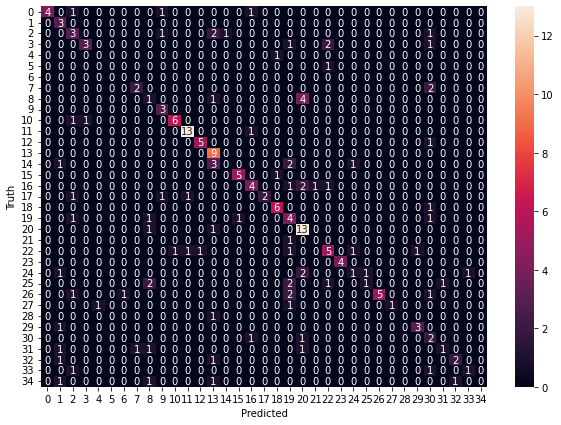

In [73]:
import seaborn as sn 
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Truth')


In [74]:
class_dict

{'Aman Gupta': 0,
 'Amancio Ortega': 1,
 'Anupam Mittal': 2,
 'Ashneer Grover': 3,
 'Barbara Corcoran': 4,
 'Bernard Arnault': 5,
 'bill gates': 6,
 'daymond john': 7,
 'elon musk': 8,
 'Emma Grede': 9,
 'Ghazal Alagh': 10,
 'goutam adani': 11,
 'Jack Ma': 12,
 'jeff bezos': 13,
 'Kevin O_Leary': 14,
 'larry ellison': 15,
 'larry page': 16,
 'Liliane Bettencourt': 17,
 'Lori Greiner': 18,
 'Mark Cuban': 19,
 'mark zukerberg': 20,
 'michael saul dell': 21,
 'Mukesh Ambani': 22,
 'namita thapar': 23,
 'Narayana Murthy': 24,
 'Peter Jones CBE': 25,
 'peyush bansal': 26,
 'Ratan Tata': 27,
 'Richard Branson': 28,
 'Robert Herjavec': 29,
 'sergey brin': 30,
 'Sheldon Adelson': 31,
 'steve jobs': 32,
 'vineeta singh': 33,
 'warren buffet': 34}

# Saving the Trained Model


In [76]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [77]:
import json 
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))